In [1]:
import re
import os
import pandas as pd
import numpy as np

In [7]:
files = []
for file in os.listdir("results/nb_walks"):
        print(file)
        files.append(file)

matches = [re.match("(.*)_(.*)_avg_(.*)_(.*).txt", file) for file in files]

# emb_dim = [float(match.group(1)) for match in matches]
dataset = [match.group(1) for match in matches]
method = [match.group(2) for match in matches]
# emb_dim = [match.group(3) for match in matches]
nb_of_walks = [float(match.group(4)) for match in matches]

20NG_deepWalk_avg_128_4.txt
webkb_deepWalk_avg_128_32.txt
webkb_deepWalk_avg_128_64.txt
20NG_deepWalk_avg_128_8.txt
webkb_deepWalk_avg_128_8.txt
20NG_deepWalk_avg_128_64.txt
20NG_deepWalk_avg_128_1.txt
webkb_deepWalk_avg_128_128.txt
webkb_deepWalk_avg_128_2.txt
webkb_deepWalk_avg_128_80.txt
20NG_deepWalk_avg_128_32.txt
webkb_deepWalk_avg_128_4.txt
20NG_deepWalk_avg_128_16.txt
webkb_deepWalk_avg_128_16.txt
webkb_deepWalk_avg_128_1.txt
20NG_deepWalk_avg_128_80.txt
20NG_deepWalk_avg_128_2.txt


In [8]:
pattern = r"Accuracy in testing set:(.*)\nMacro test:\(.*, .*, (.*), None\)\nMicro test:\(.*, .*, (.*), None\)"
pattern1 = r"Features shape:\(.*, (.*)\)"
matches = []
matches1 = []
for file in files:
    with open("results/nb_walks/"+file, 'r') as f:
        s = f.read()
        matches.append(re.search(pattern, s))
        matches1.append(re.search(pattern1, s))
                        
# we need to make sure that all matches and thus match!=None
acc = [float(match.group(1)) for match in matches]
macro_f1 = [float(match.group(2)) for match in matches]
micro_f1 = [float(match.group(3)) for match in matches]
emb_dim = [int(match.group(1)) for match in matches1]

In [9]:
pattern = r"Accuracy in training set:(.*)\nMacro:\(.*, .*, (.*), None\)\nMicro:\(.*, .*, (.*), None\)"

matches = []
for file in files:
    with open("results/nb_walks/"+file, 'r') as f:
        matches.append(re.search(pattern, f.read()))
train_acc = [float(match.group(1)) for match in matches]
train_macro_f1 = [float(match.group(2)) for match in matches]
train_micro_f1 = [float(match.group(3)) for match in matches]

In [10]:
d = {"dataset": dataset, "method":method, "emb_dim": emb_dim, "nb_of_walks": nb_of_walks, "acc":acc, "macro_f1":macro_f1, "micro_f1":micro_f1, "train_acc":train_acc, "train_macro_f1":train_macro_f1, "train_micro_f1":train_micro_f1}
df = pd.DataFrame(d)
df

,acc,dataset,emb_dim,macro_f1,method,micro_f1,nb_of_walks,train_acc,train_macro_f1,train_micro_f1
0,0.739870,20NG,128,0.723137,deepWalk,0.739870,4.0,0.814841,0.802662,0.814841
1,0.847421,webkb,128,0.828676,deepWalk,0.847421,32.0,0.896896,0.887080,0.896896
2,0.848854,webkb,128,0.832085,deepWalk,0.848854,64.0,0.896539,0.888604,0.896539
3,0.743324,20NG,128,0.729108,deepWalk,0.743324,8.0,0.829186,0.819809,0.829186
4,0.847421,webkb,128,0.832728,deepWalk,0.847421,8.0,0.867642,0.856217,0.867642
5,0.759001,20NG,128,0.742013,deepWalk,0.759001,64.0,0.828921,0.817128,0.828921
6,0.724459,20NG,128,0.704164,deepWalk,0.724459,1.0,0.793855,0.781768,0.793855
7,0.861032,webkb,128,0.844519,deepWalk,0.861032,128.0,0.884410,0.874847,0.884410
8,0.832378,webkb,128,0.816239,deepWalk,0.832378,2.0,0.869782,0.855311,0.869782
9,0.856734,webkb,128,0.838776,deepWalk,0.856734,80.0,0.883696,0.872199,0.883696


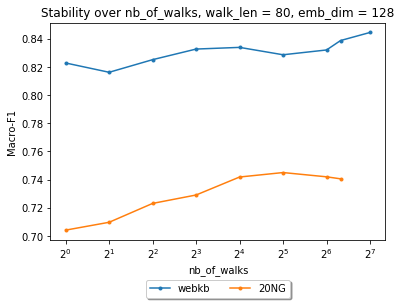

In [16]:
import matplotlib.pyplot as plt
datasets = ['webkb', '20NG']
for dataset in datasets:
    series = df[df.dataset==dataset].sort_values(by=['nb_of_walks'])
#     print(series)
    plt.plot(series.nb_of_walks,series.macro_f1,'.-', label=dataset)
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='x-small')
# plt.rc('ytick', labelsize='x-small')
plt.title("Stability over nb_of_walks, walk_len = 80, emb_dim = 128")
plt.ylabel('Macro-F1')
plt.xlabel('nb_of_walks')
plt.xscale("log",basex=2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.16),shadow=True, ncol=3)
plt.savefig('nb_of_walks_webkb_20NG.png', dpi=300)

plt.show()